# Import Modules and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

In [2]:
df_train_full = pd.read_csv('train.csv')
df_test_full = pd.read_csv('test.csv')

In [3]:
df_train_full.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [4]:
df_test_full.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


# Summary


This Jupyter notebook focuses on predicting whether passengers aboard the spaceship Titanic were transported to another dimension. The notebook starts by dealing with missing data on passengers and then incorporating data relating to the side and deck of the ship passengers are on.

Several classification models are then initialized and tuned using this augmented data. Among the models tested, Random Forest classifier,  Logistic Regression classifier, K-Nearest Neighbors classifier, XGBoost regressor, and Cat Boost regressor demonstrate the best performance, achieving an accuracy score of approximately 0.8.


# Data Exploration

In [5]:
df_train_full.shape

(8693, 14)

In [6]:
df_train_full.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
df_train_full.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
df_train_full.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


## Selecting useful features and checking for missing data

In [9]:
df_train_dropped = df_train_full[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported']]

In [10]:
df_train_dropped.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<AxesSubplot: >

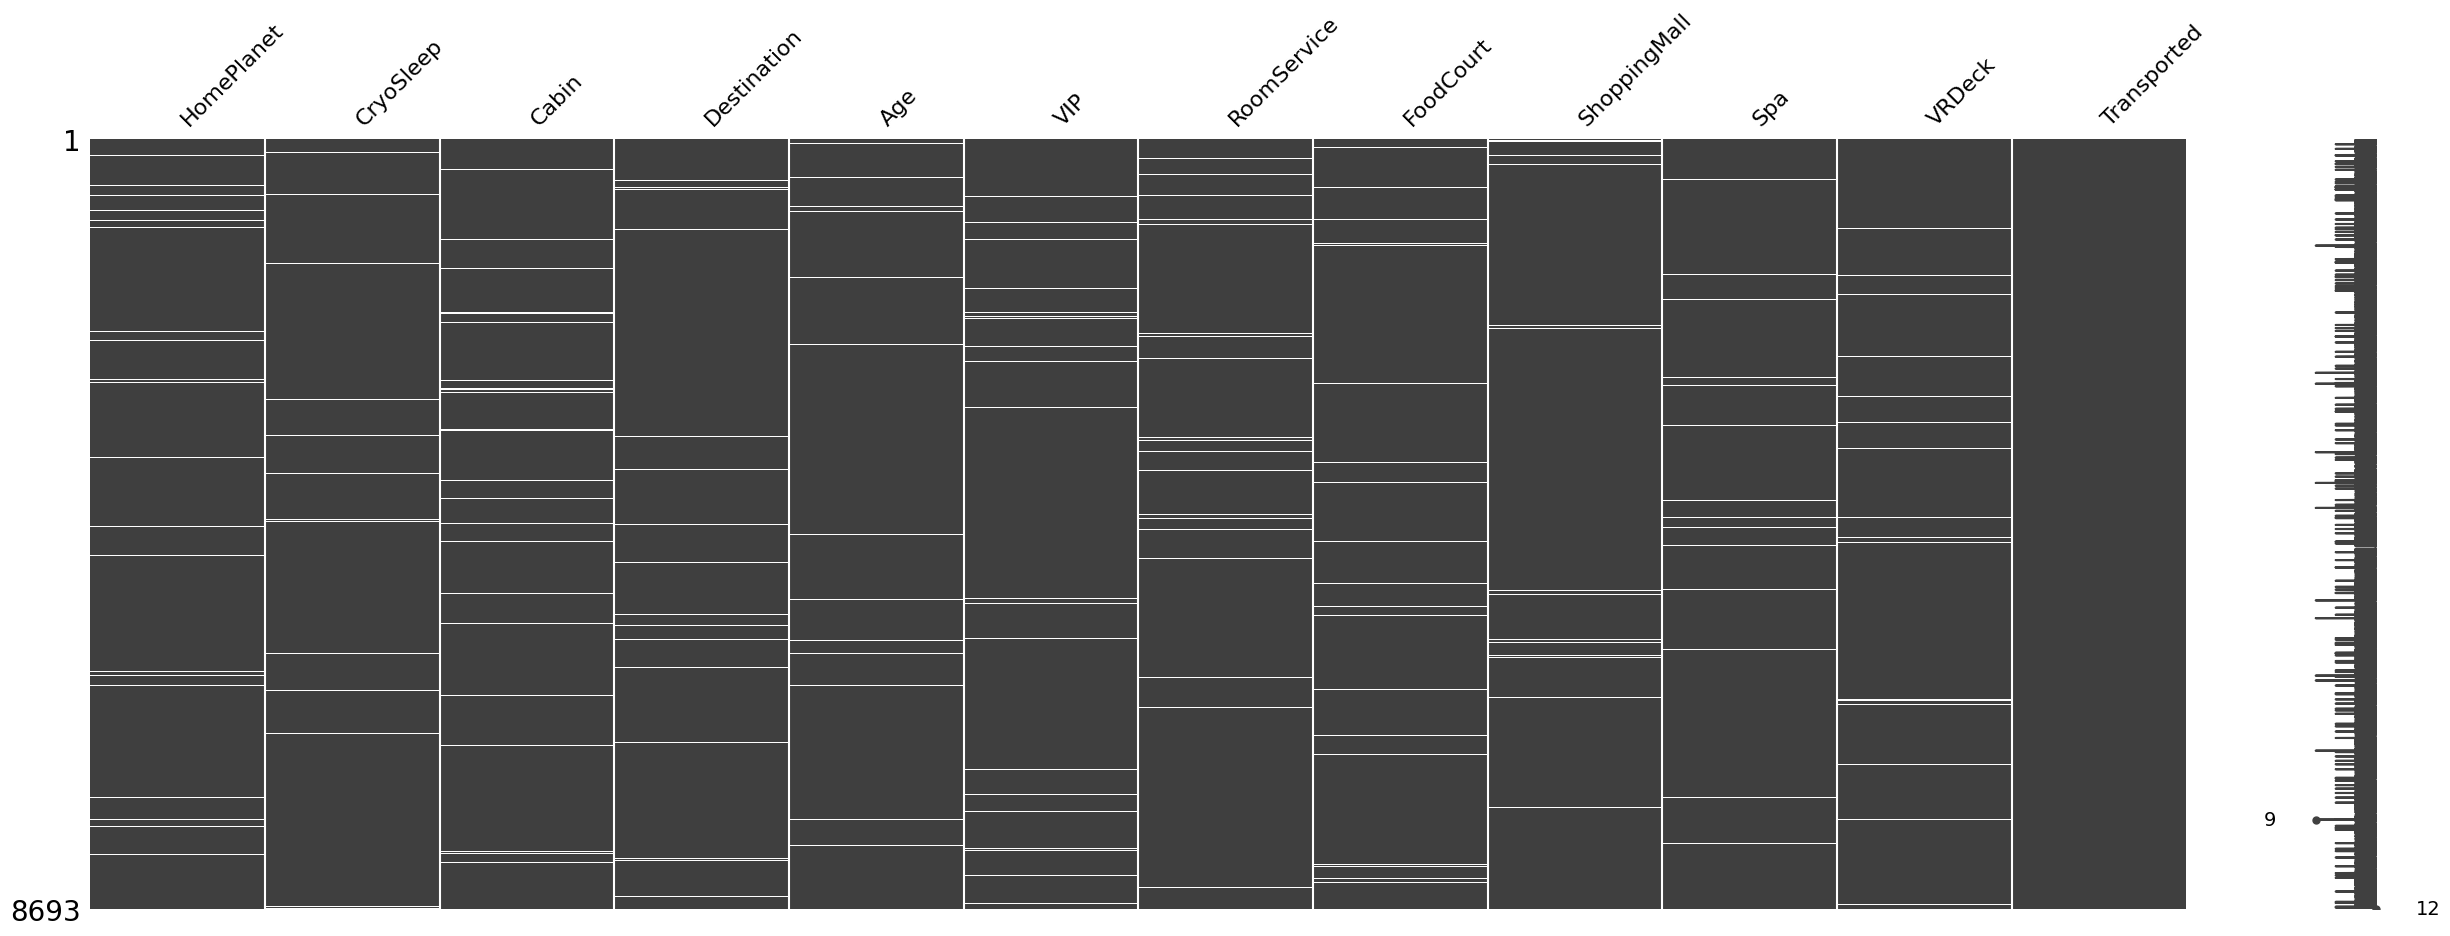

In [11]:
missingno.matrix(df_train_dropped, figsize=(30,10))

## Splitting data into categorical and continuous data and visualising data

In [12]:
train_num = [ 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_cat = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [13]:
for column in df_train_dropped[train_cat]:
    column_counts = df_train_full[column].value_counts()
    print(str(column))
    print(column_counts, '\n')

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64 

CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64 

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64 

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64 

VIP
False    8291
True      199
Name: VIP, dtype: int64 



array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

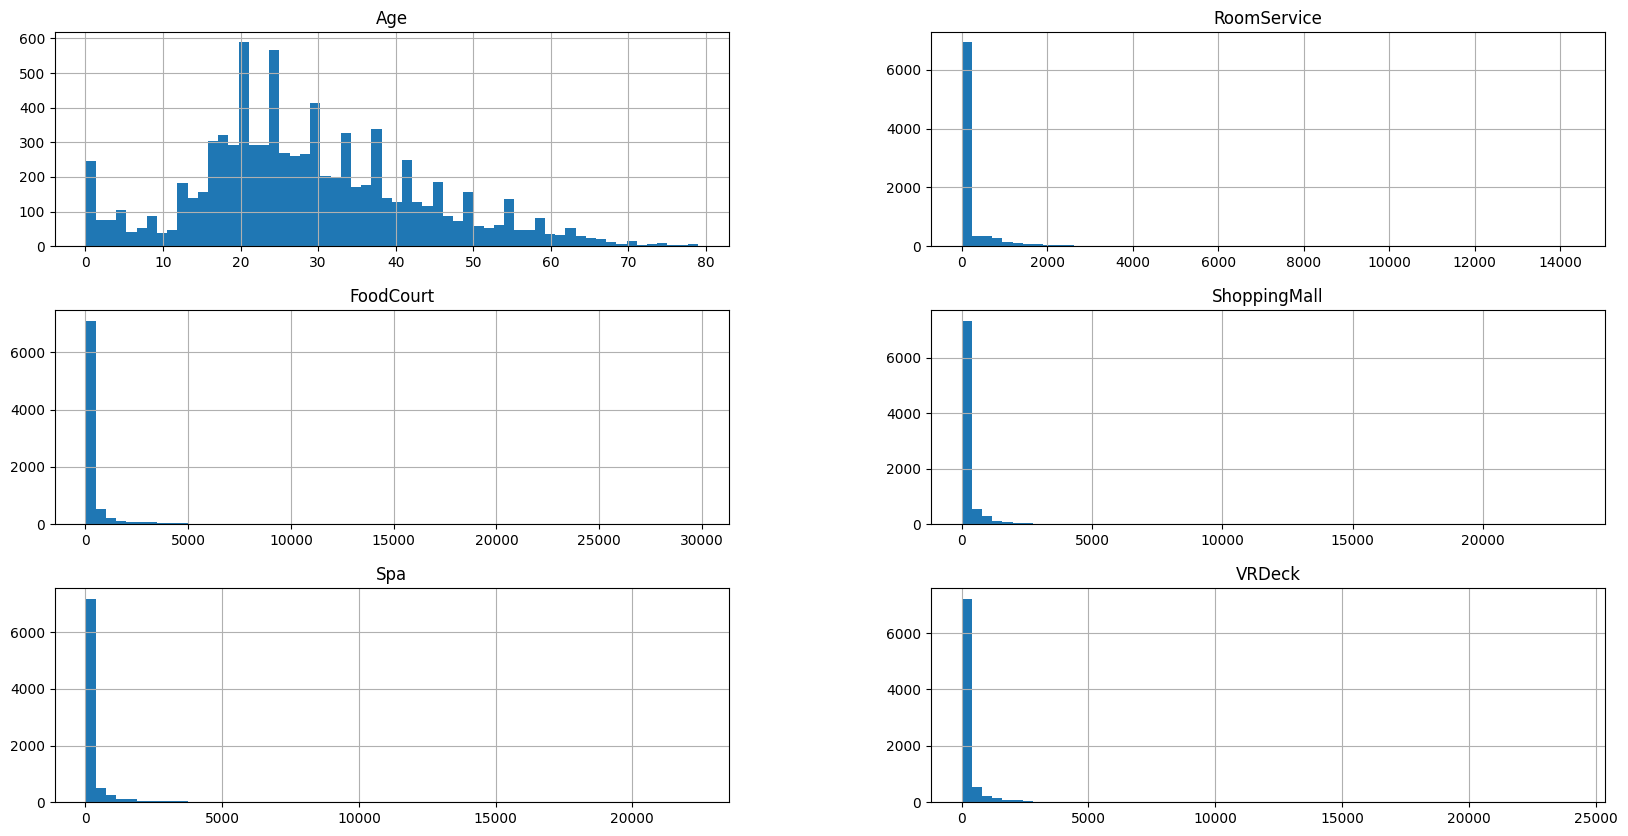

In [14]:
df_train_dropped[train_num].hist(figsize=(20,10), bins=60)

## Checking for outliers in the data

<AxesSubplot: xlabel='index', ylabel='RoomService'>

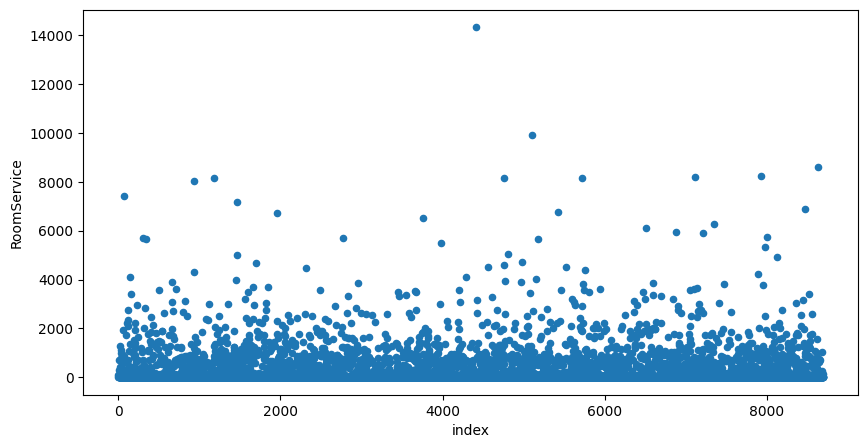

In [15]:
df_train_dropped.reset_index().plot(kind='scatter', y='RoomService', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='FoodCourt'>

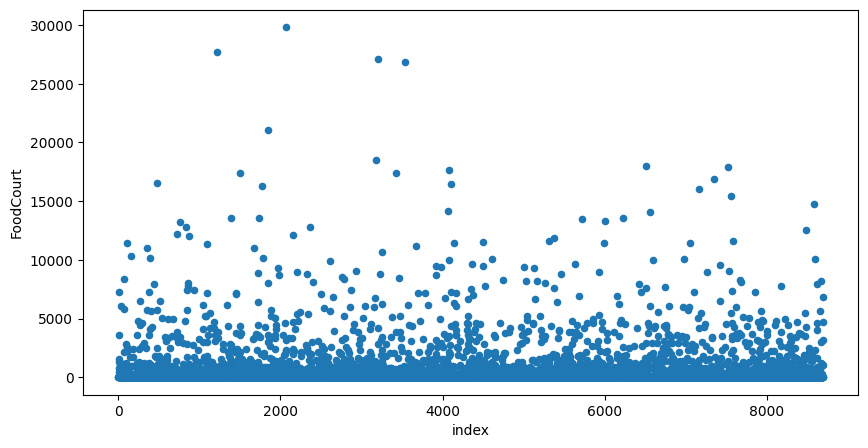

In [16]:
df_train_dropped.reset_index().plot(kind='scatter', y='FoodCourt', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='ShoppingMall'>

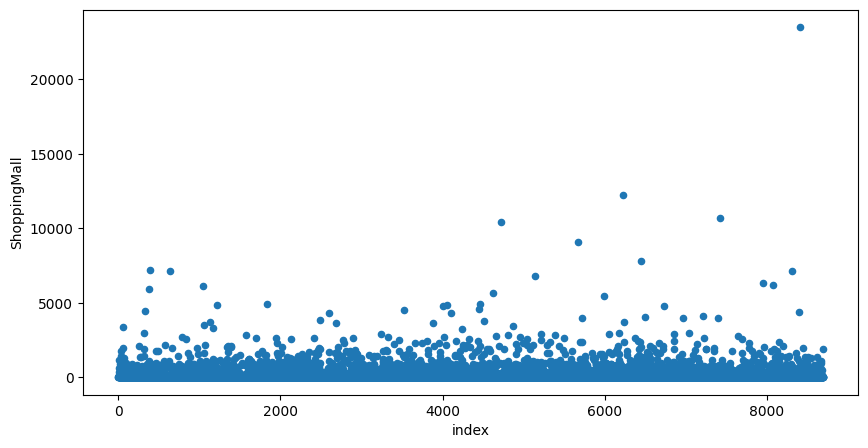

In [17]:
df_train_dropped.reset_index().plot(kind='scatter', y='ShoppingMall', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='Spa'>

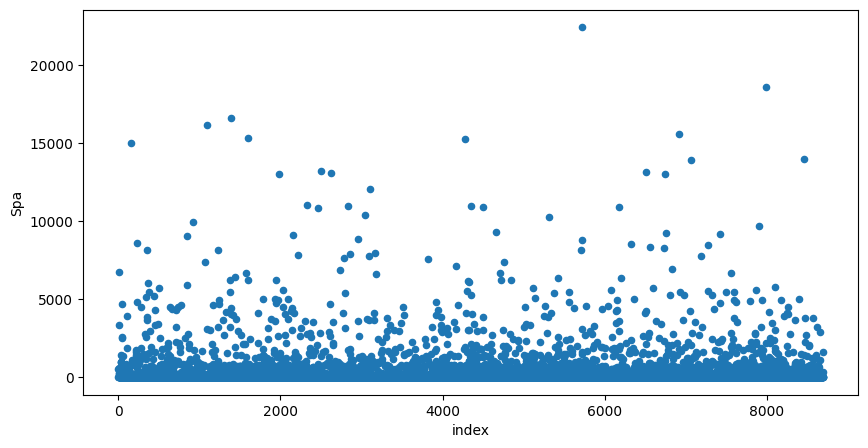

In [18]:
df_train_dropped.reset_index().plot(kind='scatter', y='Spa', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='VRDeck'>

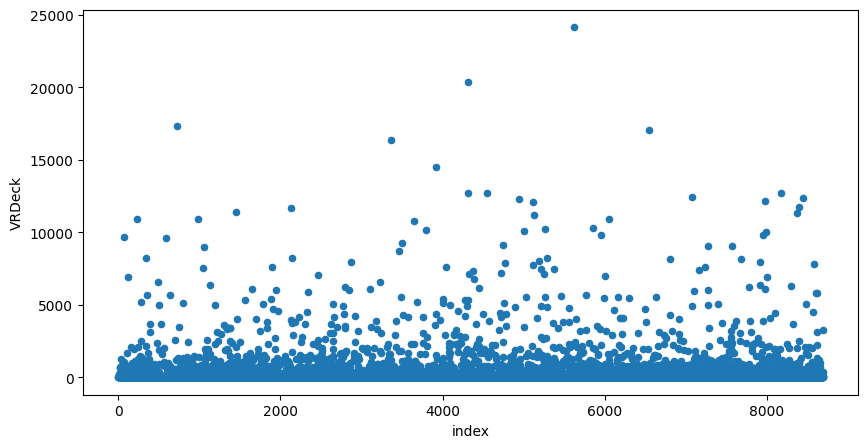

In [19]:
df_train_dropped.reset_index().plot(kind='scatter', y='VRDeck', x='index', figsize=(10,5))

## Checking for multicollinearity 

<AxesSubplot: >

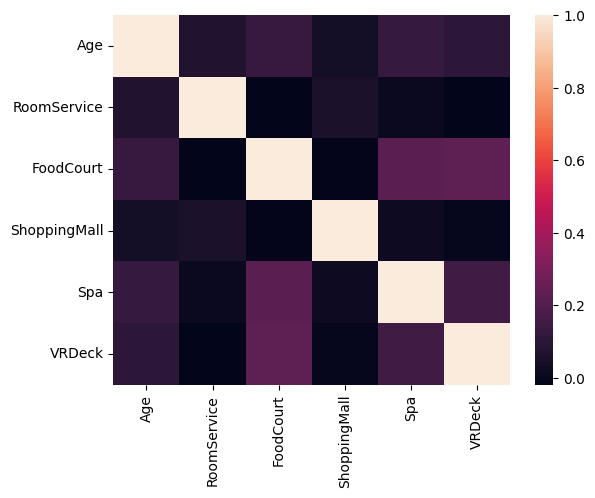

In [20]:
df_train_dropped[train_num].corr()
sns.heatmap(df_train_dropped[train_num].corr())

# Data Cleaning

## Continuous data

In [21]:
df_train_dropped[train_num].isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

### Age data

Any records with missing ages are assigned with the mean age

In [22]:
df_train_dropped.loc[df_train_dropped['Age'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
50,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.00,0.00,2.00,4683.00,0.00,False
64,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.00,0.00,2.00,253.00,0.00,False
137,Earth,True,G/27/S,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,True
181,Europa,False,A/2/P,55 Cancri e,NaN,False,0.00,2433.00,NaN,878.00,443.00,True
184,Europa,False,C/9/S,55 Cancri e,NaN,False,2.00,1720.00,12.00,1125.00,122.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8274,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.00,0.00,0.00,0.00,0.00,False
8301,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.00,0.00,0.00,0.00,0.00,True
8374,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.00,1.00,10.00,629.00,0.00,False
8407,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.00,0.00,0.00,0.00,0.00,True


In [23]:
mean_age = df_train_dropped['Age'].mean()
median_age = df_train_dropped['Age'].median()
print(mean_age)
print(median_age)

28.82793046746535
27.0


In [24]:
df_train_dropped.loc[df_train_dropped['Age'].isna(), 'Age']  = mean_age

In [25]:
df_train_dropped.loc[df_train_dropped['Age'].isna()].shape

(0, 12)

### Using the "CryoSleep" data for other missing continuous data

The total mony spent on 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' and 'VRDeck' for passengers in cryosleep was checked and as no one spend any money on these services if they were in cryosleep any missing values for passengers in cryosleep were set to 0

In [26]:
print(df_train_dropped[df_train_dropped['CryoSleep'] == True]['RoomService'].sum())
print(df_train_dropped[df_train_dropped['CryoSleep'] == True]['FoodCourt'].sum())
print(df_train_dropped[df_train_dropped['CryoSleep'] == True]['ShoppingMall'].sum())
print(df_train_dropped[df_train_dropped['CryoSleep'] == True]['Spa'].sum())
print(df_train_dropped[df_train_dropped['CryoSleep'] == True]['VRDeck'].sum())

0.0
0.0
0.0
0.0
0.0


In [27]:
df_train_dropped.loc[df_train_dropped['CryoSleep'] == True, 'RoomService'] = 0.0
df_train_dropped.loc[df_train_dropped['CryoSleep'] == True, 'FoodCourt'] = 0.0
df_train_dropped.loc[df_train_dropped['CryoSleep'] == True, 'ShoppingMall'] = 0.0
df_train_dropped.loc[df_train_dropped['CryoSleep'] == True, 'Spa'] = 0.0
df_train_dropped.loc[df_train_dropped['CryoSleep'] == True, 'VRDeck'] = 0.0

### Dealing with remaining missing continuous data

All of the other continuous data have skewed distributions so the median values were calcuated for 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' and 'VRDeck' and any record where the data was missing had the values for each data column set to the respective median value.

In [28]:
df_train_dropped[train_num].isna().sum()

Age               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
dtype: int64

In [29]:
df_train_dropped.loc[df_train_dropped['RoomService'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
35,Mars,False,F/9/P,TRAPPIST-1e,20.00,False,NaN,0.00,1750.00,990.00,0.00,True
132,Mars,False,F/30/P,TRAPPIST-1e,31.00,False,NaN,0.00,97.00,0.00,0.00,False
170,Mars,False,F/41/P,TRAPPIST-1e,23.00,False,NaN,0.00,8.00,1072.00,0.00,False
220,Earth,False,F/50/P,TRAPPIST-1e,43.00,False,NaN,888.00,0.00,0.00,0.00,False
280,Europa,False,NaN,TRAPPIST-1e,67.00,False,NaN,230.00,0.00,4476.00,241.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8392,Europa,False,C/300/P,55 Cancri e,28.00,False,NaN,3751.00,0.00,5025.00,11741.00,False
8425,Earth,False,E/591/S,TRAPPIST-1e,47.00,False,NaN,1.00,0.00,967.00,5.00,False
8525,Earth,False,F/1865/P,TRAPPIST-1e,21.00,False,NaN,0.00,496.00,430.00,0.00,False
8534,Mars,False,D/290/P,TRAPPIST-1e,28.00,False,NaN,0.00,0.00,0.00,0.00,False


In [30]:
(df_train_dropped['RoomService'] == 0.0).sum()

5645

In [31]:
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['RoomService'] == 0.0)].shape)
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['RoomService'] != 0.0)].shape)

(2464, 12)
(2975, 12)


In [32]:
mean_rs = df_train_dropped[df_train_dropped['CryoSleep'] == False]['RoomService'].mean()
median_rs = df_train_dropped[df_train_dropped['CryoSleep'] == False]['RoomService'].median()

print(mean_rs)
print(median_rs)

350.1467717717718
3.0


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

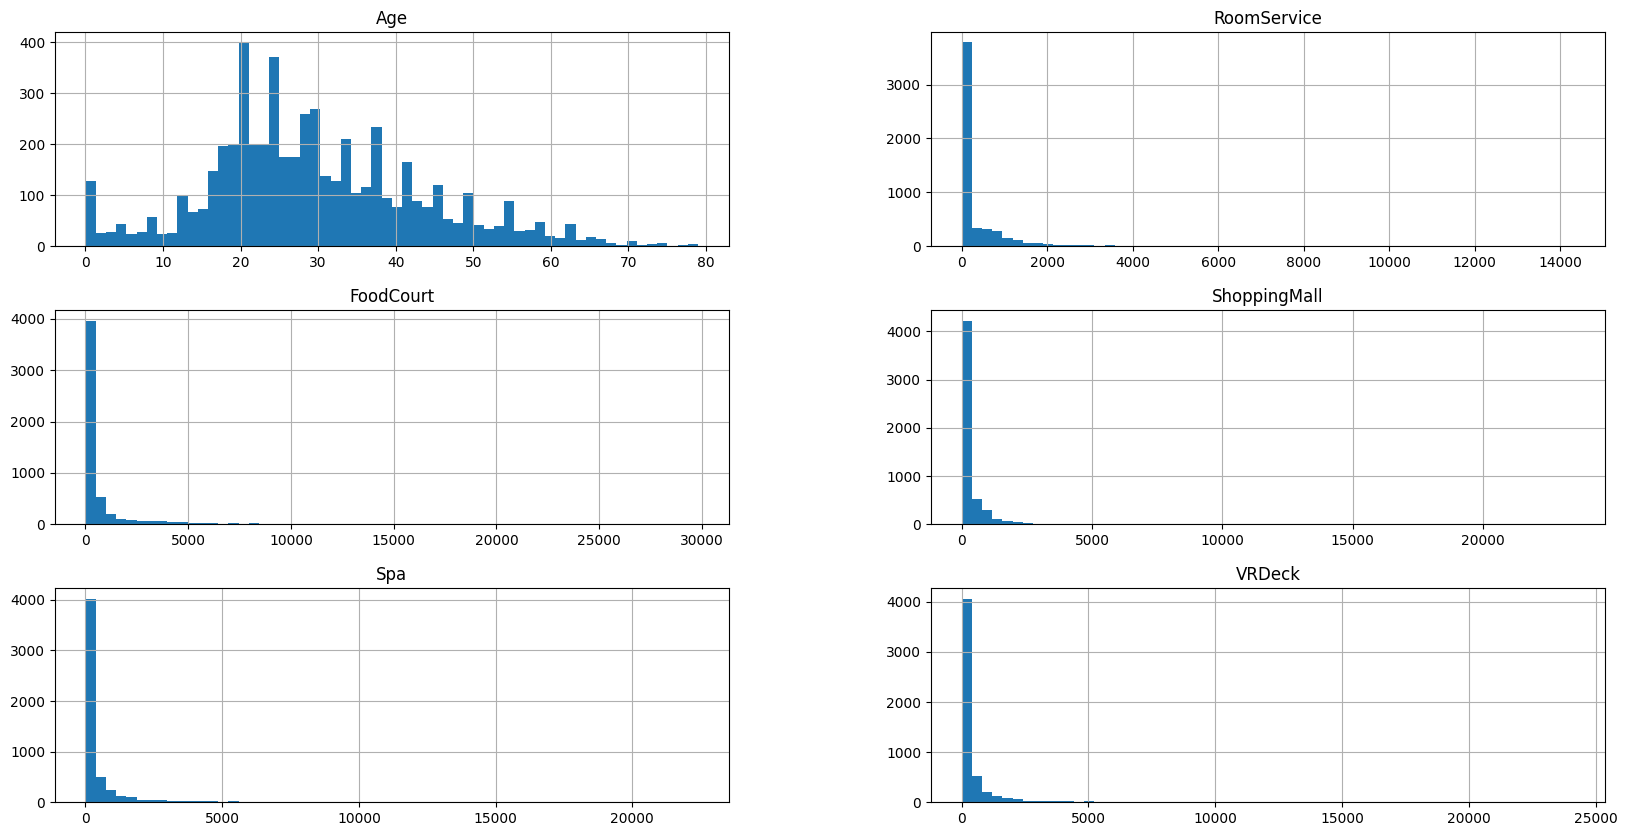

In [33]:
df_train_dropped[df_train_dropped['CryoSleep'] == False][train_num].hist(figsize=(20,10), bins=60)

In [34]:
df_train_dropped.loc[df_train_dropped['RoomService'].isna()].shape

(113, 12)

In [35]:
df_train_dropped.loc[df_train_dropped['RoomService'].isna(), 'RoomService'] = median_rs

In [36]:
df_train_dropped.loc[df_train_dropped['RoomService'].isna()].shape

(0, 12)

In [37]:
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['FoodCourt'] == 0.0)].shape)
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['FoodCourt'] != 0.0)].shape)

(2354, 12)
(3085, 12)


In [38]:

mean_fc = df_train_dropped[df_train_dropped['CryoSleep'] == False]['FoodCourt'].mean()
median_fc = df_train_dropped[df_train_dropped['CryoSleep'] == False]['FoodCourt'].median()

print(mean_fc)
print(median_fc)

713.0043160067555
5.0


In [39]:
df_train_dropped.loc[df_train_dropped['FoodCourt'].isna()].shape

(113, 12)

In [40]:
df_train_dropped.loc[df_train_dropped['FoodCourt'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
95,Earth,False,F/24/S,TRAPPIST-1e,24.00,False,0.00,NaN,0.00,0.00,17.00,True
367,Earth,False,F/89/P,55 Cancri e,17.00,False,177.00,NaN,0.00,310.00,7.00,False
385,Europa,False,E/26/P,TRAPPIST-1e,31.00,False,417.00,NaN,7185.00,562.00,792.00,True
483,Earth,False,G/78/S,TRAPPIST-1e,55.00,False,62.00,NaN,0.00,0.00,NaN,False
547,Earth,False,F/107/S,NaN,21.00,False,0.00,NaN,625.00,110.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8385,Mars,False,F/1734/S,TRAPPIST-1e,28.00,False,1708.00,NaN,65.00,1.00,0.00,False
8396,Earth,False,F/1840/P,TRAPPIST-1e,27.00,False,1.00,NaN,0.00,20.00,948.00,False
8460,Europa,False,D/288/P,TRAPPIST-1e,60.00,False,0.00,NaN,947.00,668.00,1.00,True
8537,Earth,False,F/1868/P,TRAPPIST-1e,26.00,False,0.00,NaN,0.00,1.00,48.00,True


In [41]:
df_train_dropped.loc[df_train_dropped['FoodCourt'].isna(), 'FoodCourt'] = median_fc

In [42]:
df_train_dropped.loc[df_train_dropped['FoodCourt'].isna()].shape

(0, 12)

In [43]:
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['ShoppingMall'] == 0.0)].shape)
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['ShoppingMall'] != 0.0)].shape)

(2502, 12)
(2937, 12)


In [44]:
mean_sm = df_train_dropped[df_train_dropped['CryoSleep'] == False]['ShoppingMall'].mean()
median_sm = df_train_dropped[df_train_dropped['CryoSleep'] == False]['ShoppingMall'].median()

print(mean_sm)
print(median_sm)

270.58650421743204
2.0


In [45]:
df_train_dropped.loc[df_train_dropped['ShoppingMall'].isna()].shape

(112, 12)

In [46]:
df_train_dropped.loc[df_train_dropped['ShoppingMall'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
16,Mars,False,F/3/P,55 Cancri e,27.00,False,1286.00,122.00,NaN,0.00,0.00,False
181,Europa,False,A/2/P,55 Cancri e,28.83,False,0.00,2433.00,NaN,878.00,443.00,True
199,Earth,False,E/10/P,TRAPPIST-1e,25.00,False,122.00,84.00,NaN,0.00,0.00,False
239,Mars,False,F/49/S,55 Cancri e,21.00,False,1664.00,0.00,NaN,0.00,0.00,False
287,Europa,False,B/9/S,TRAPPIST-1e,24.00,False,0.00,2628.00,NaN,170.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,Mars,False,E/577/P,TRAPPIST-1e,30.00,False,522.00,0.00,NaN,0.00,27.00,True
8611,Earth,False,F/1880/P,PSO J318.5-22,24.00,False,3.00,599.00,NaN,0.00,0.00,True
8633,Earth,False,G/1486/S,TRAPPIST-1e,60.00,False,0.00,8.00,NaN,360.00,74.00,False
8641,Earth,False,F/1886/P,PSO J318.5-22,22.00,False,623.00,0.00,NaN,0.00,53.00,True


In [47]:
df_train_dropped.loc[df_train_dropped['ShoppingMall'].isna(), 'ShoppingMall'] = median_sm

In [48]:
df_train_dropped.loc[df_train_dropped['ShoppingMall'].isna()].shape

(0, 12)

In [49]:
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['Spa'] == 0.0)].shape)
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['Spa'] != 0.0)].shape)

(2218, 12)
(3221, 12)


In [50]:
mean_spa = df_train_dropped[df_train_dropped['CryoSleep'] == False]['Spa'].mean()
median_spa = df_train_dropped[df_train_dropped['CryoSleep'] == False]['Spa'].median()

print(mean_spa)
print(median_spa)

486.09294029290277
7.0


In [51]:
df_train_dropped.loc[df_train_dropped['Spa'].isna()].shape

(118, 12)

In [52]:
df_train_dropped.loc[df_train_dropped['Spa'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
48,Earth,False,E/1/S,55 Cancri e,35.00,False,790.00,0.00,0.00,NaN,0.00,False
143,Earth,False,G/28/S,TRAPPIST-1e,57.00,False,50.00,1688.00,0.00,NaN,135.00,True
289,Earth,False,G/44/S,TRAPPIST-1e,18.00,False,0.00,2.00,0.00,NaN,0.00,False
431,Mars,False,F/100/P,TRAPPIST-1e,34.00,False,865.00,0.00,257.00,NaN,35.00,False
461,Europa,False,E/32/P,TRAPPIST-1e,42.00,False,0.00,929.00,967.00,NaN,481.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8112,Mars,False,F/1676/S,TRAPPIST-1e,20.00,False,733.00,0.00,455.00,NaN,0.00,False
8219,Earth,False,F/1810/P,TRAPPIST-1e,20.00,False,874.00,0.00,80.00,NaN,0.00,False
8340,Earth,False,F/1723/S,55 Cancri e,19.00,False,720.00,2.00,2.00,NaN,0.00,False
8554,Mars,False,D/291/P,TRAPPIST-1e,31.00,False,2575.00,1.00,2.00,NaN,0.00,False


In [53]:
df_train_dropped.loc[df_train_dropped['Spa'].isna(), 'Spa'] = median_spa

In [54]:
df_train_dropped.loc[df_train_dropped['Spa'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [55]:
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['VRDeck'] == 0.0)].shape)
print(df_train_dropped.loc[(df_train_dropped['CryoSleep'] == False) & (df_train_dropped['VRDeck'] != 0.0)].shape)

(2381, 12)
(3058, 12)


In [56]:
mean_vr = df_train_dropped[df_train_dropped['CryoSleep'] == False]['VRDeck'].mean()
median_vr = df_train_dropped[df_train_dropped['CryoSleep'] == False]['VRDeck'].median()

print(mean_vr)
print(median_vr)

475.7161654135338
4.0


In [57]:
df_train_dropped.loc[df_train_dropped['VRDeck'].isna()].shape

(126, 12)

In [58]:
df_train_dropped.loc[df_train_dropped['VRDeck'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
111,Mars,NaN,F/24/P,TRAPPIST-1e,26.00,False,0.00,0.00,0.00,0.00,NaN,True
251,Earth,False,NaN,TRAPPIST-1e,35.00,False,0.00,0.00,0.00,888.00,NaN,False
290,Earth,False,G/44/S,TRAPPIST-1e,21.00,False,0.00,5.00,3.00,0.00,NaN,False
483,Earth,False,G/78/S,TRAPPIST-1e,55.00,False,62.00,5.00,0.00,0.00,NaN,False
484,Earth,False,E/32/S,TRAPPIST-1e,23.00,False,39.00,263.00,0.00,0.00,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8073,Earth,False,F/1665/S,TRAPPIST-1e,17.00,False,2.00,33.00,97.00,553.00,NaN,False
8209,Europa,False,NaN,55 Cancri e,53.00,False,0.00,1127.00,0.00,3939.00,NaN,False
8345,Europa,False,D/280/P,TRAPPIST-1e,26.00,False,0.00,70.00,0.00,41.00,NaN,False
8404,Earth,False,E/590/S,TRAPPIST-1e,19.00,False,0.00,810.00,21.00,788.00,NaN,False


In [59]:
df_train_dropped.loc[df_train_dropped['VRDeck'].isna(), 'VRDeck'] = median_vr

In [60]:
df_train_dropped.loc[df_train_dropped['VRDeck'].isna()].shape

(0, 12)

<AxesSubplot: >

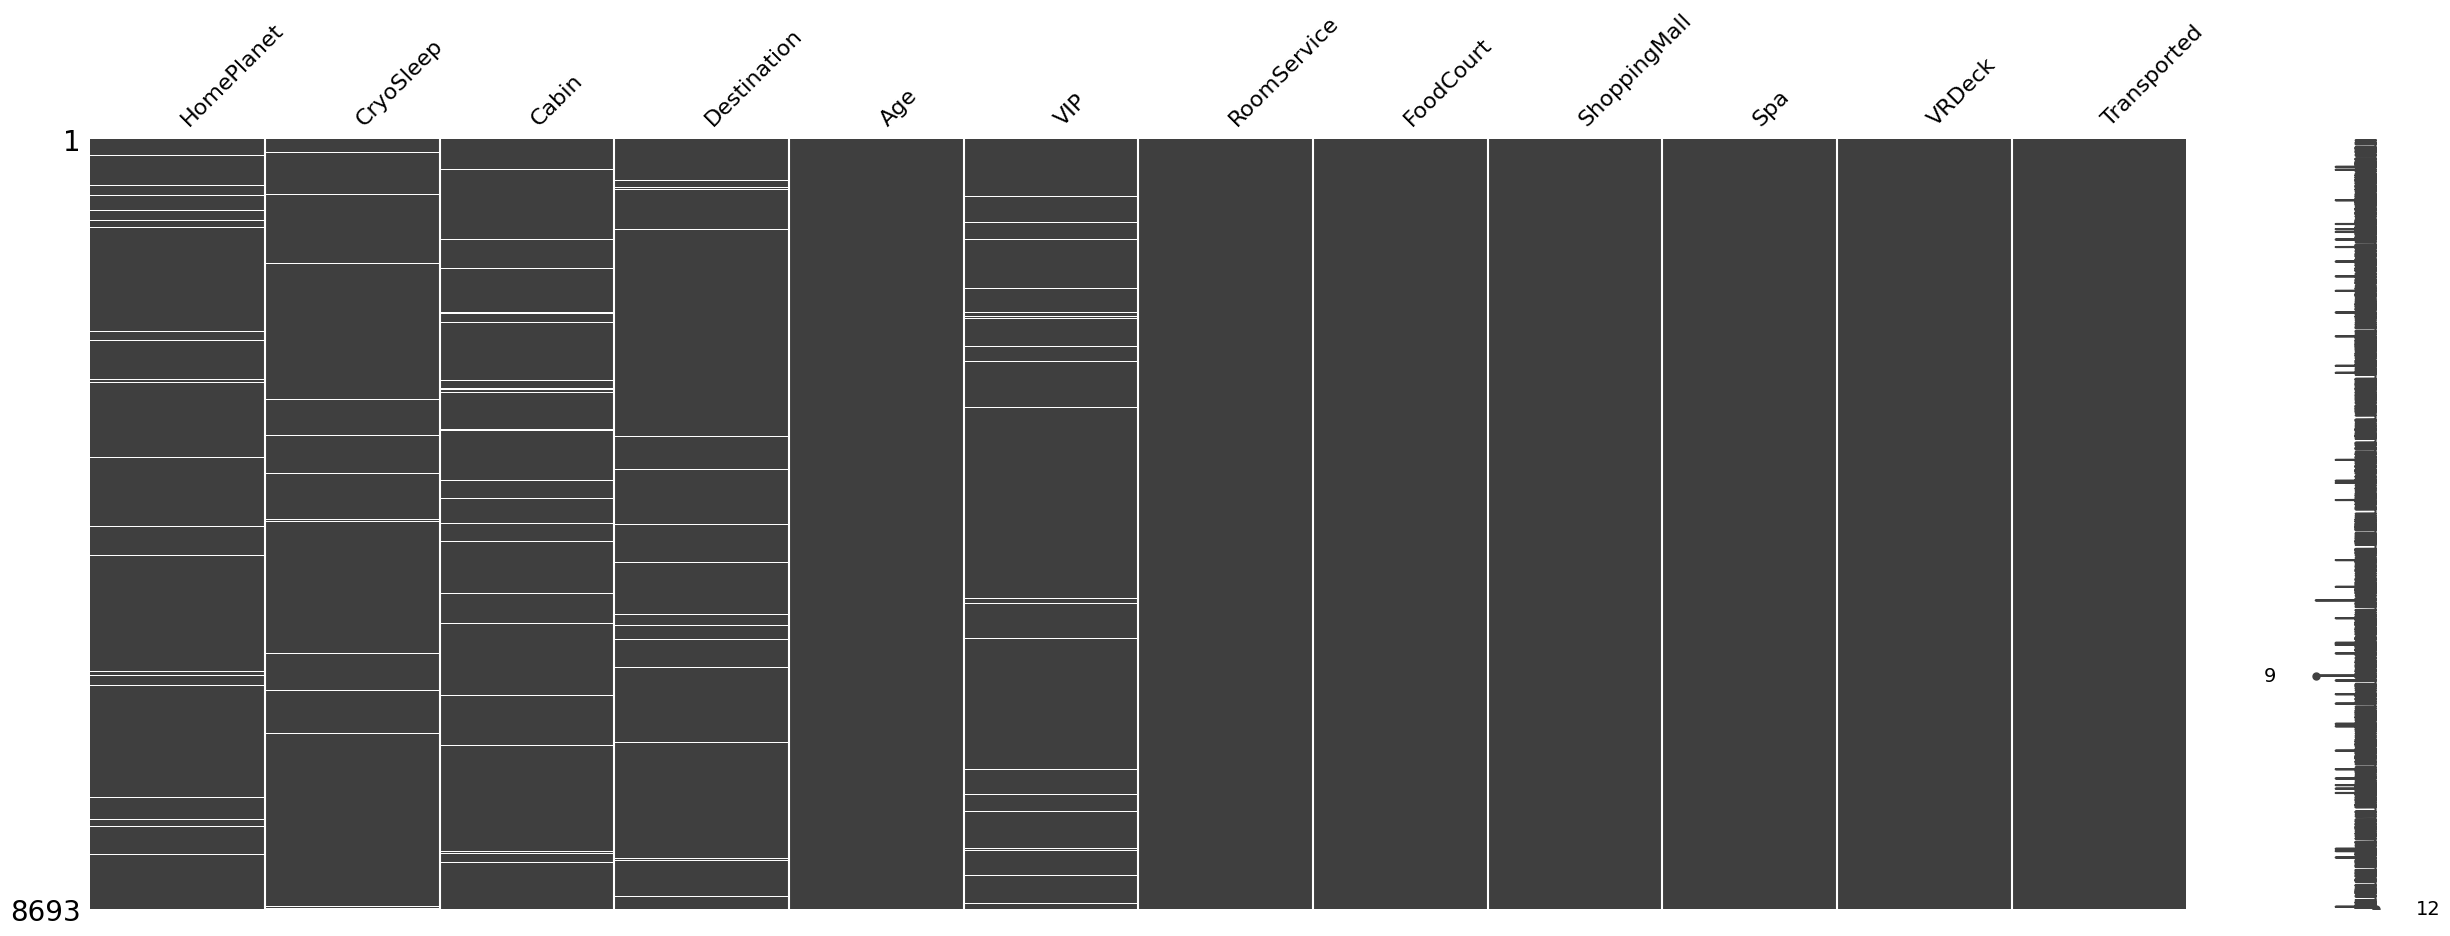

In [61]:
missingno.matrix(df_train_dropped, figsize=(30,10))

# Data Cleaning continued

## Categorical data

In [62]:
df_train_dropped[train_cat].isna().sum()

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
dtype: int64

### Missing VIP data
The vast majority of passengers are not VIP so any records where the data were missing were set to false

In [63]:
df_train_dropped['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [64]:
df_train_dropped.loc[df_train_dropped['VIP'].isna(), 'VIP'] = False

In [65]:
df_train_dropped[df_train_dropped['VIP'].isna()].shape

(0, 12)

### Missing CryoSleep data

As seen before, passengers in cryo-sleep do not spend money on amenities so any passenger with missing 'CryoSleep' data that has spent money on 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' or 'VRDeck' has their 'CryoSleep' status set to True. Where no money has been spent on amenities the 'CryoSleep' status is set to False.

In [66]:
df_train_dropped['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [67]:
df_train_dropped[df_train_dropped['CryoSleep'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
92,Earth,NaN,G/12/P,TRAPPIST-1e,2.00,False,0.00,0.00,0.00,0.00,0.00,True
98,Earth,NaN,F/21/P,TRAPPIST-1e,27.00,False,0.00,0.00,570.00,2.00,131.00,False
104,Europa,NaN,B/5/P,TRAPPIST-1e,40.00,False,0.00,331.00,0.00,0.00,1687.00,False
111,Mars,NaN,F/24/P,TRAPPIST-1e,26.00,False,0.00,0.00,0.00,0.00,4.00,True
152,Earth,NaN,E/11/S,TRAPPIST-1e,58.00,False,0.00,985.00,0.00,5.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8620,Europa,NaN,C/308/P,55 Cancri e,44.00,False,0.00,0.00,0.00,0.00,0.00,True
8651,Earth,NaN,G/1498/P,TRAPPIST-1e,8.00,False,0.00,0.00,0.00,0.00,0.00,False
8664,Earth,NaN,G/1490/S,TRAPPIST-1e,32.00,False,0.00,0.00,0.00,0.00,0.00,True
8675,Earth,NaN,F/1893/P,TRAPPIST-1e,44.00,False,1030.00,1015.00,0.00,11.00,4.00,True


In [68]:
df_train_dropped[(df_train_dropped['CryoSleep'].isna()) & ((df_train_dropped['RoomService'] > 0.0) | (df_train_dropped['FoodCourt'] > 0.0) | (df_train_dropped['ShoppingMall'] > 0.0) | (df_train_dropped['Spa'] > 0.0) | (df_train_dropped['VRDeck'] > 0.0))]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
98,Earth,NaN,F/21/P,TRAPPIST-1e,27.00,False,0.00,0.00,570.00,2.00,131.00,False
104,Europa,NaN,B/5/P,TRAPPIST-1e,40.00,False,0.00,331.00,0.00,0.00,1687.00,False
111,Mars,NaN,F/24/P,TRAPPIST-1e,26.00,False,0.00,0.00,0.00,0.00,4.00,True
152,Earth,NaN,E/11/S,TRAPPIST-1e,58.00,False,0.00,985.00,0.00,5.00,0.00,True
224,Europa,NaN,E/11/P,55 Cancri e,33.00,False,0.00,1249.00,0.00,4812.00,1116.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Earth,NaN,F/1844/P,PSO J318.5-22,27.00,False,32.00,8.00,5.00,588.00,18.00,False
8455,Earth,NaN,G/1455/S,TRAPPIST-1e,51.00,False,0.00,0.00,689.00,0.00,32.00,False
8591,Earth,NaN,E/587/P,TRAPPIST-1e,33.00,False,1060.00,403.00,1.00,0.00,145.00,False
8675,Earth,NaN,F/1893/P,TRAPPIST-1e,44.00,False,1030.00,1015.00,0.00,11.00,4.00,True


In [69]:
df_train_dropped.loc[(df_train_dropped['CryoSleep'].isna()) & ((df_train_dropped['RoomService'] > 0.0) | (df_train_dropped['FoodCourt'] > 0.0) | (df_train_dropped['ShoppingMall'] > 0.0) | (df_train_dropped['Spa'] > 0.0) | (df_train_dropped['VRDeck'] > 0.0)), 'CryoSleep'] = False

In [70]:
df_train_dropped[(df_train_dropped['CryoSleep'].isna()) & ((df_train_dropped['RoomService'] > 0.0) | (df_train_dropped['FoodCourt'] > 0.0) | (df_train_dropped['ShoppingMall'] > 0.0) | (df_train_dropped['Spa'] > 0.0) | (df_train_dropped['VRDeck'] > 0.0))]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [71]:
df_train_dropped[df_train_dropped['CryoSleep'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
92,Earth,NaN,G/12/P,TRAPPIST-1e,2.00,False,0.00,0.00,0.00,0.00,0.00,True
175,Earth,NaN,G/30/P,PSO J318.5-22,52.00,False,0.00,0.00,0.00,0.00,0.00,True
266,Europa,NaN,B/7/S,TRAPPIST-1e,43.00,False,0.00,0.00,0.00,0.00,0.00,True
392,Europa,NaN,B/20/P,55 Cancri e,27.00,False,0.00,0.00,0.00,0.00,0.00,True
626,Mars,NaN,E/45/S,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,Earth,NaN,G/1461/S,TRAPPIST-1e,32.00,False,0.00,0.00,0.00,0.00,0.00,False
8612,Earth,NaN,G/1483/S,PSO J318.5-22,35.00,False,0.00,0.00,0.00,0.00,0.00,False
8620,Europa,NaN,C/308/P,55 Cancri e,44.00,False,0.00,0.00,0.00,0.00,0.00,True
8651,Earth,NaN,G/1498/P,TRAPPIST-1e,8.00,False,0.00,0.00,0.00,0.00,0.00,False


In [72]:
df_train_dropped.loc[df_train_dropped['CryoSleep'].isna(), 'CryoSleep'] = True

In [73]:
df_train_dropped[df_train_dropped['CryoSleep'].isna()].shape

(0, 12)

### Missing Destination data

There is no way to tell what the 'Destination' would be for the missing records so all missing data is set to 'TRAPPIST-1e' which is the most common destination.

In [74]:
df_train_dropped['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [75]:
df_train_dropped[df_train_dropped['Destination'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
47,Mars,True,F/10/P,NaN,19.00,False,0.00,0.00,0.00,0.00,0.00,True
128,Earth,False,E/5/P,NaN,34.00,False,0.00,22.00,0.00,564.00,207.00,False
139,Earth,False,F/32/P,NaN,41.00,False,0.00,0.00,0.00,0.00,607.00,False
347,NaN,False,G/64/P,NaN,23.00,False,348.00,0.00,0.00,4.00,368.00,False
430,Earth,True,G/67/S,NaN,50.00,False,0.00,0.00,0.00,0.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,Earth,True,G/1453/P,NaN,20.00,False,0.00,0.00,0.00,0.00,0.00,True
8551,Mars,True,F/1765/S,NaN,41.00,False,0.00,0.00,0.00,0.00,0.00,True
8616,Mars,True,F/1779/S,NaN,33.00,False,0.00,0.00,0.00,0.00,0.00,True
8621,Europa,False,C/308/P,NaN,41.00,True,0.00,7964.00,0.00,3238.00,5839.00,False


In [76]:
df_train_dropped.loc[df_train_dropped['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'

In [77]:
df_train_dropped[df_train_dropped['Destination'].isna()].shape

(0, 12)

### Missing Destination data¶

There is no way to tell what the 'HomePlanet' would be for the missing records so all missing data is set to 'Earth' which is the most common home planet.

In [78]:
df_train_dropped['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [79]:
df_train_dropped[df_train_dropped['HomePlanet'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
59,NaN,True,E/3/S,TRAPPIST-1e,33.00,False,0.00,0.00,0.00,0.00,0.00,True
113,NaN,False,A/0/P,TRAPPIST-1e,39.00,False,0.00,2344.00,0.00,65.00,6898.00,False
186,NaN,True,D/6/P,55 Cancri e,24.00,False,0.00,0.00,0.00,0.00,0.00,True
225,NaN,False,F/46/S,TRAPPIST-1e,18.00,False,313.00,1.00,691.00,283.00,0.00,False
234,NaN,True,C/11/S,55 Cancri e,54.00,False,0.00,0.00,0.00,0.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,E/582/P,TRAPPIST-1e,25.00,False,1258.00,0.00,22.00,19.00,0.00,False
8613,NaN,False,E/603/S,55 Cancri e,53.00,False,0.00,4017.00,0.00,13.00,3147.00,False
8666,NaN,False,F/1792/S,55 Cancri e,38.00,False,28.00,1208.00,973.00,207.00,0.00,True
8674,NaN,False,F/1892/P,TRAPPIST-1e,13.00,False,39.00,0.00,1085.00,24.00,0.00,False


In [80]:
df_train_dropped.loc[df_train_dropped['HomePlanet'].isna(), 'HomePlanet'] = 'Earth'

In [81]:
df_train_dropped[df_train_dropped['HomePlanet'].isna()].shape

(0, 12)

### Cabin data - missing values and feature engineering

Information about the side of the ship and the deck that the passenger's cabin is on is present in the 'Cabin' column. A new 'Deck' and 'Side' column are added and the information for each record is extracted from the 'Cabin' column and inserted into the respective columns.

Where there is missing data; for the 'Side' column, half of the missing values are assinged as P (port) and half as S (starboard) as there are roughly equal numbers of passengers on each side. For the Deck the mssing values are set to F as this is the most common deck for passengers to  be on.

The cabin columns is then dropped from the data frame.

In [82]:
df_train_dropped[df_train_dropped['Cabin'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
15,Earth,False,NaN,TRAPPIST-1e,31.00,False,32.00,0.00,876.00,0.00,0.00,False
93,Mars,True,NaN,TRAPPIST-1e,31.00,False,0.00,0.00,0.00,0.00,0.00,True
103,Europa,False,NaN,TRAPPIST-1e,32.00,False,0.00,410.00,6.00,3929.00,764.00,False
222,Mars,False,NaN,TRAPPIST-1e,37.00,False,637.00,0.00,0.00,92.00,319.00,False
227,Mars,True,NaN,TRAPPIST-1e,43.00,False,0.00,0.00,0.00,0.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8209,Europa,False,NaN,55 Cancri e,53.00,False,0.00,1127.00,0.00,3939.00,4.00,False
8475,Europa,False,NaN,55 Cancri e,36.00,True,132.00,3479.00,0.00,3786.00,0.00,False
8485,Europa,True,NaN,55 Cancri e,25.00,False,0.00,0.00,0.00,0.00,0.00,True
8509,Earth,True,NaN,TRAPPIST-1e,1.00,False,0.00,0.00,0.00,0.00,0.00,False


In [83]:
df_train_dropped['Deck'] = df_train_dropped['Cabin'].map(lambda x: str(x).split("/")[0])

C:\Users\Craig\AppData\Local\Temp\ipykernel_14108\361795779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_dropped['Deck'] = df_train_dropped['Cabin'].map(lambda x: str(x).split("/")[0])


In [84]:
df_train_dropped['Side'] = df_train_dropped['Cabin'].map(lambda x: str(x).split("/")[-1])

In [85]:
df_train_dropped.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,B,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,F,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,A,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,A,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,F,S


In [86]:
df_train_dropped['Side'].value_counts()

S      4288
P      4206
nan     199
Name: Side, dtype: int64

In [87]:
df_train_dropped['Deck'].value_counts()

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
nan     199
T         5
Name: Deck, dtype: int64

In [88]:
df_train_dropped[df_train_dropped['Side'] == 'nan']

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
15,Earth,False,NaN,TRAPPIST-1e,31.00,False,32.00,0.00,876.00,0.00,0.00,False,nan,nan
93,Mars,True,NaN,TRAPPIST-1e,31.00,False,0.00,0.00,0.00,0.00,0.00,True,nan,nan
103,Europa,False,NaN,TRAPPIST-1e,32.00,False,0.00,410.00,6.00,3929.00,764.00,False,nan,nan
222,Mars,False,NaN,TRAPPIST-1e,37.00,False,637.00,0.00,0.00,92.00,319.00,False,nan,nan
227,Mars,True,NaN,TRAPPIST-1e,43.00,False,0.00,0.00,0.00,0.00,0.00,True,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,Europa,False,NaN,55 Cancri e,53.00,False,0.00,1127.00,0.00,3939.00,4.00,False,nan,nan
8475,Europa,False,NaN,55 Cancri e,36.00,True,132.00,3479.00,0.00,3786.00,0.00,False,nan,nan
8485,Europa,True,NaN,55 Cancri e,25.00,False,0.00,0.00,0.00,0.00,0.00,True,nan,nan
8509,Earth,True,NaN,TRAPPIST-1e,1.00,False,0.00,0.00,0.00,0.00,0.00,False,nan,nan


In [89]:
nan_indices = df_train_dropped.loc[df_train_dropped['Side'] == 'nan'].index
nan_indices.shape

(199,)

In [90]:
df_train_dropped.loc[nan_indices[:100],'Side'] = 'P'
df_train_dropped.loc[nan_indices[100:],'Side'] = 'S'

In [91]:
df_train_dropped[df_train_dropped['Side'] == 'nan'].shape

(0, 14)

In [92]:
df_train_dropped.loc[df_train_dropped['Deck'] == 'nan', 'Deck'] = 'F'

In [93]:
df_train_dropped.drop('Cabin', axis=1, inplace=True)

In [94]:
df_train_dropped.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,B,P
1,Earth,False,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,F,S
2,Europa,False,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,A,S
3,Europa,False,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,A,S
4,Earth,False,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,F,S


## All the missing data has been dealt with and new features added

<AxesSubplot: >

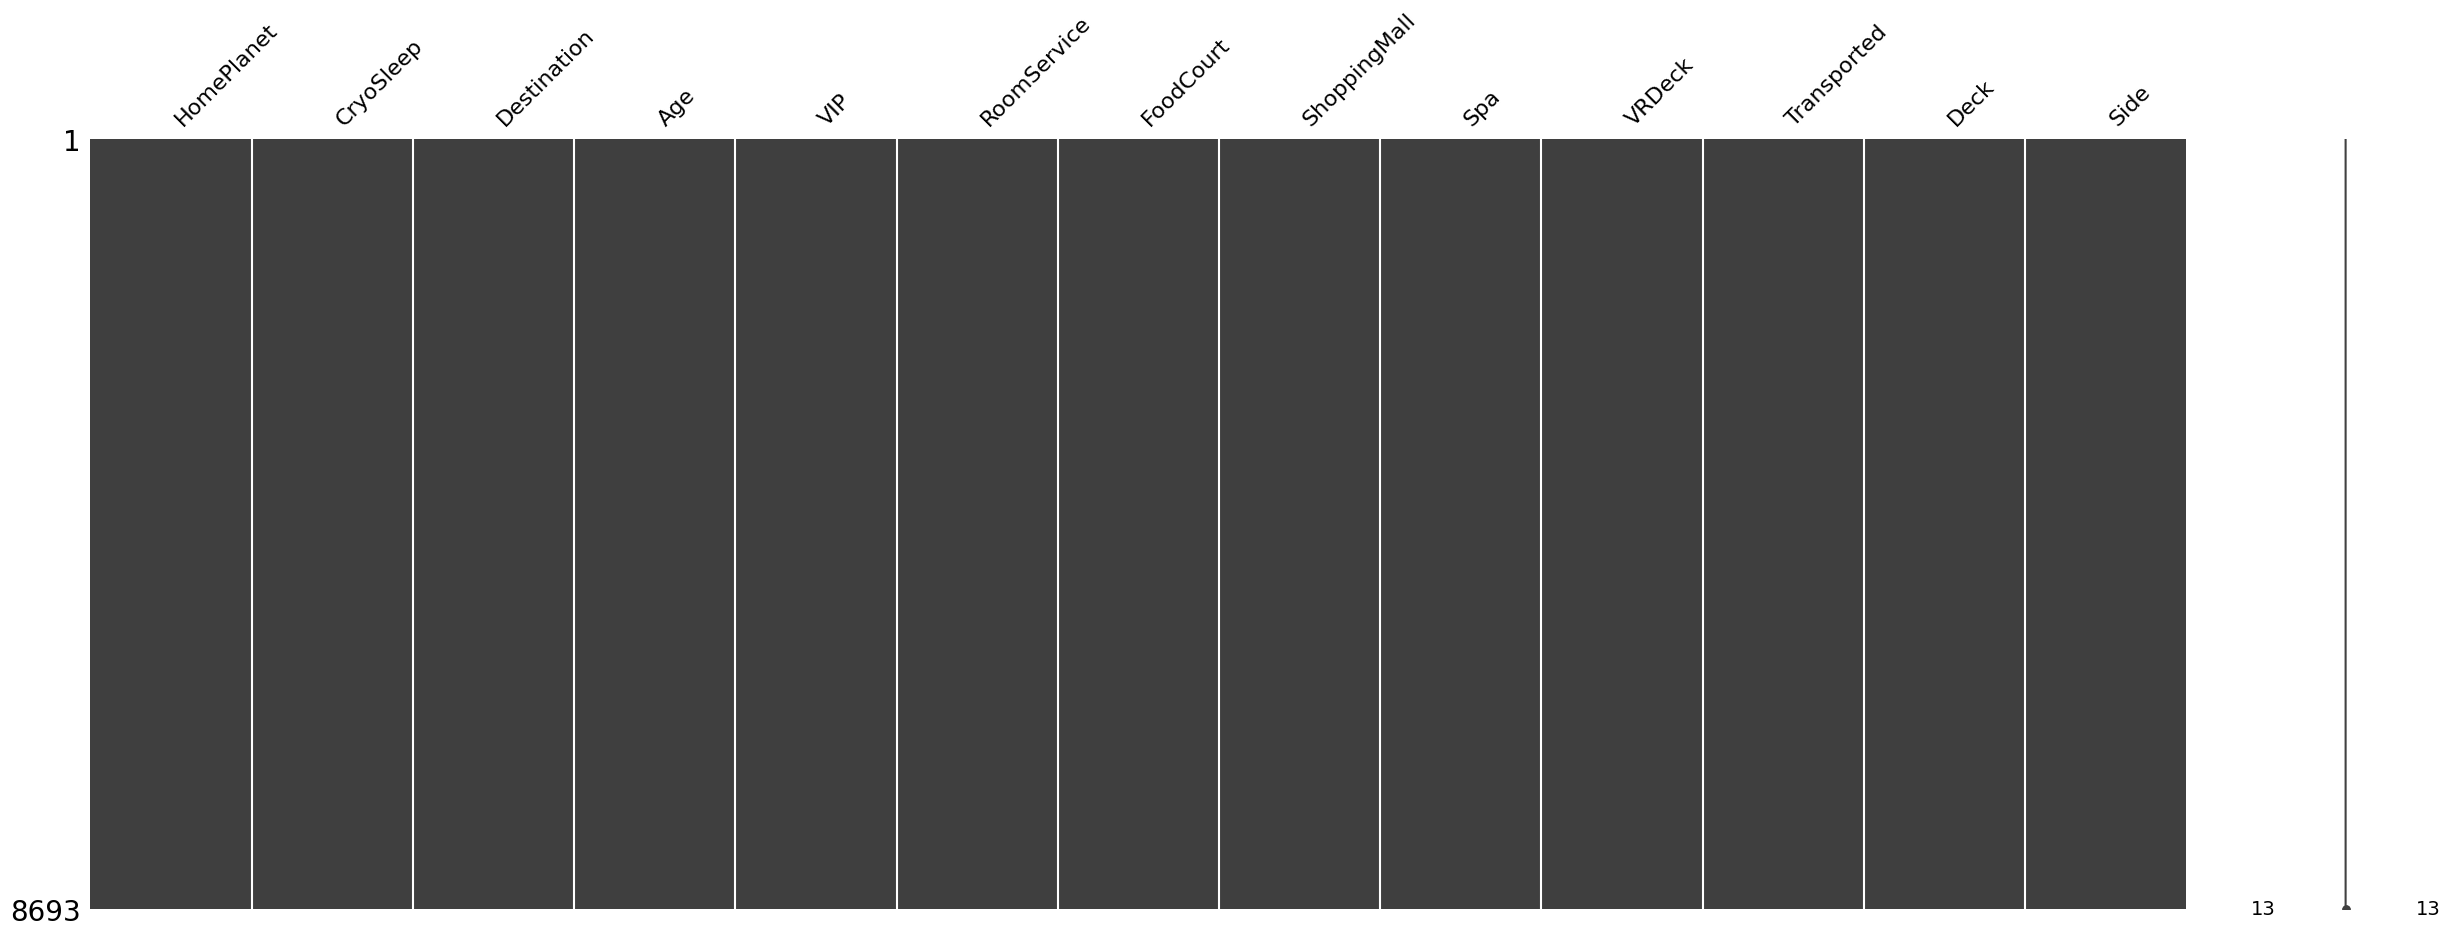

In [95]:
missingno.matrix(df_train_dropped, figsize=(30,10))

## Visualisation of categorical data

The categorical data is plotted as histograms for the full data set and for passengers that were transported to give us an idea of which categories might be most important when making models for predicting the fate of passengers in the test dataset

In [96]:
new_cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

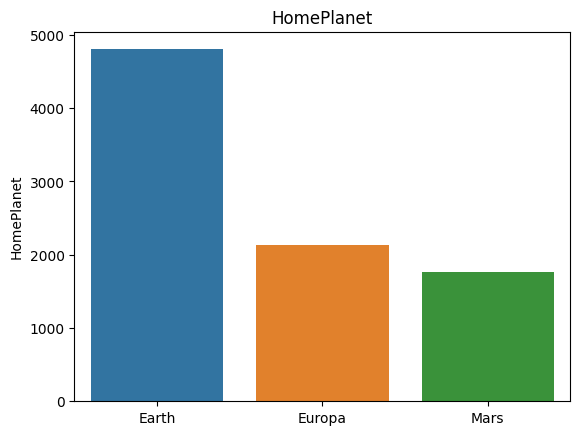

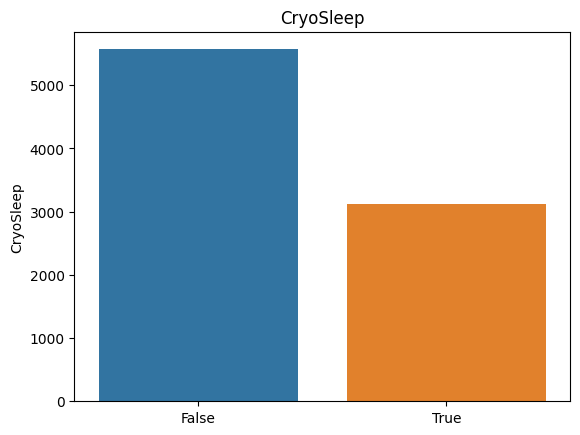

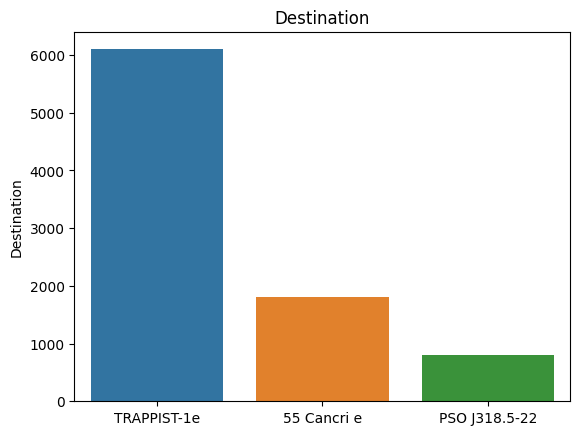

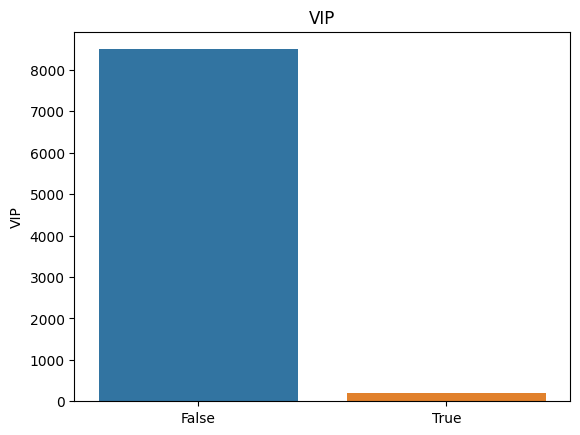

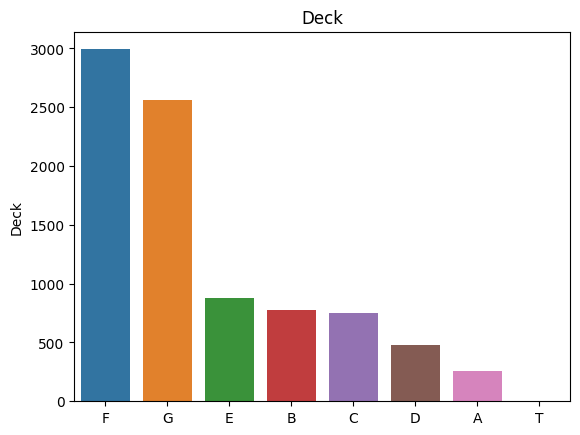

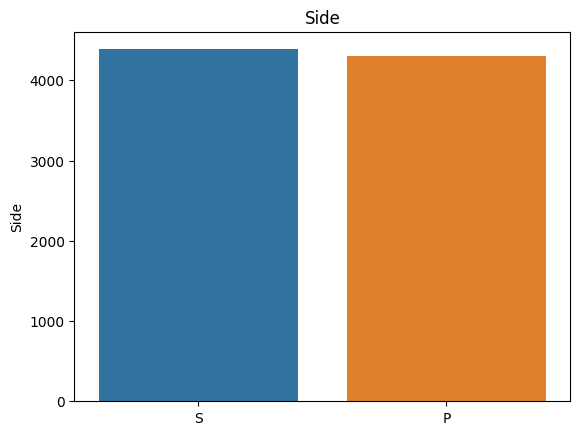

In [97]:
for i in new_cat_columns:
    sns.barplot(x=df_train_dropped[i].value_counts().index, y=df_train_dropped[i].value_counts()).set_title(i)
    plt.show()

In [98]:
df_cat_transported_true = df_train_dropped[df_train_dropped['Transported'] == True][new_cat_columns]

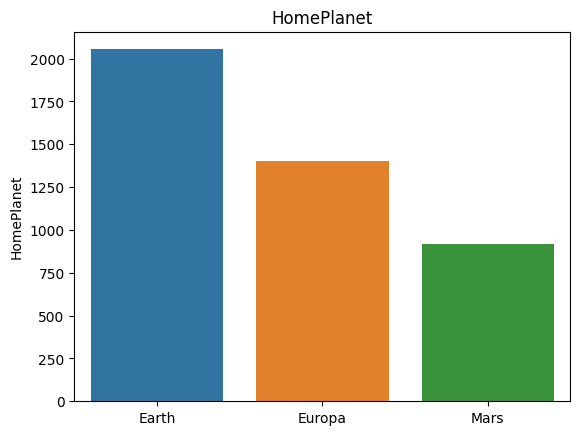

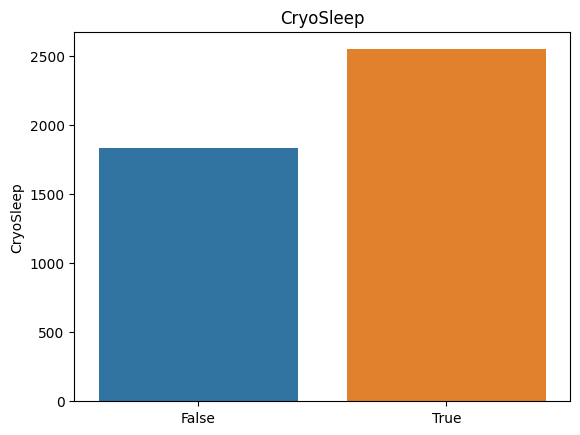

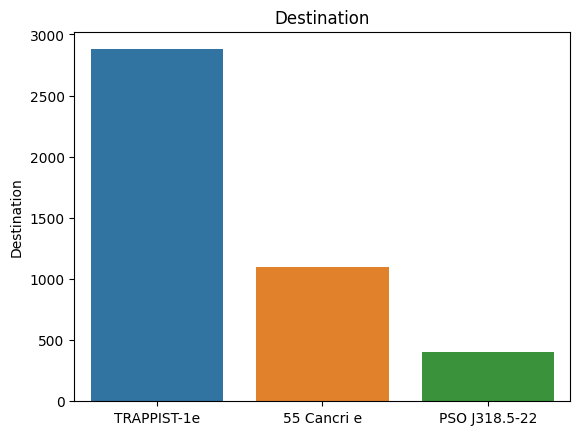

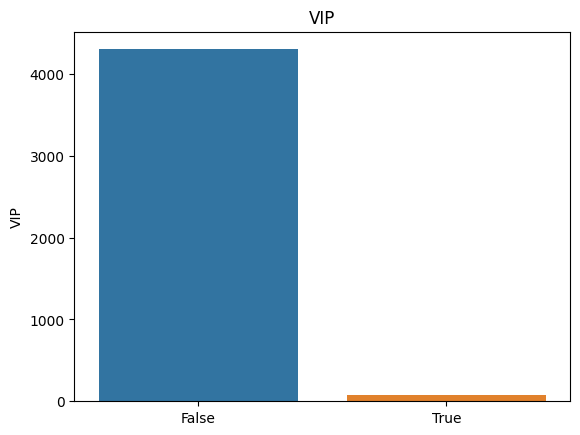

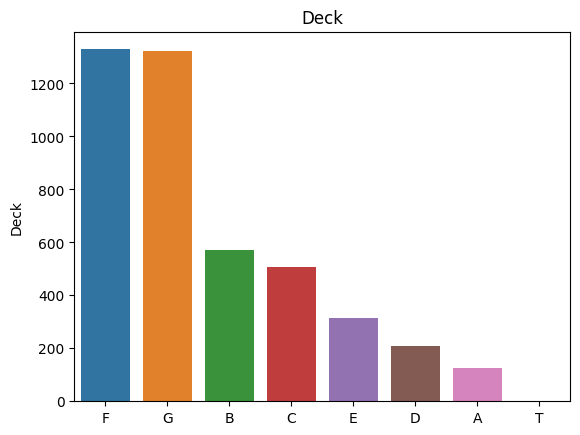

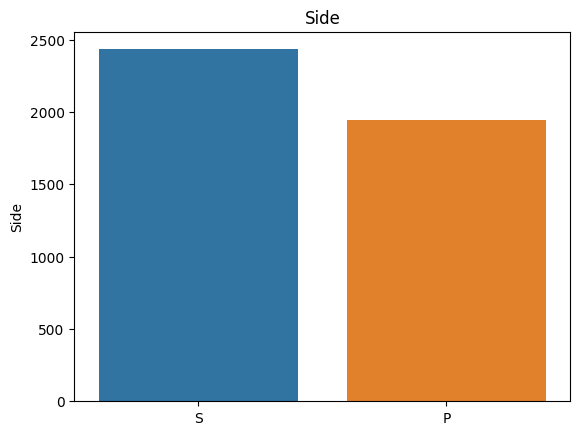

In [99]:
for j in df_cat_transported_true.columns:
    sns.barplot(x=df_cat_transported_true[j].value_counts().index, y=df_cat_transported_true[j].value_counts()).set_title(j)
    plt.show()

# Model building

## Importing models and metrics

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost import plot_tree
import lightgbm as lgb
from catboost import CatBoostClassifier


from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Data prepartion

The 'Transported' columns of the dataframe is stored in a variable as the ground truth and the 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck' and 'Side' columns are passed to the get_dummies function to prepare the categorical data for use with the models with are going to use.

In [101]:
y_train = df_train_dropped['Transported']
y_train.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [102]:
X_train = pd.get_dummies(df_train_dropped[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
                                           'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side']])

In [103]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.00,0.00,0.00,0.00,0.00,0.00,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,24.00,109.00,9.00,25.00,549.00,44.00,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,58.00,43.00,3576.00,0.00,6715.00,49.00,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,33.00,0.00,1283.00,371.00,3329.00,193.00,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,16.00,303.00,70.00,151.00,565.00,2.00,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


## Benchmark models

Several models are selected and 5-fold cross validation use used to determine how effective they are a predicting the fate of passengers, models selected are:
- Gaussian Naive Bayes
- Logistic Regression 
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors Classifier
- XGBoost Classifier
- Light Boost Classifier

The best performing models were; Logistic Regression, Random Forest Classifier, K-Nearest Neighbors Classifier, XGBoost Classifier and Light Boost Classifier to which hyperparameter tuning was then applied



In [106]:
gnb = GaussianNB()

cv_gnb = cross_val_score(gnb, X_train, y_train, cv=5)

print(cv_gnb)
print(cv_gnb.mean())

[0.74123059 0.72512938 0.77400805 0.79171461 0.74453395]
0.7553233178334174


In [107]:
lr = LogisticRegression(max_iter=2000)

cv_lr = cross_val_score(lr, X_train, y_train, cv=5)

print(cv_lr)
print(cv_lr.mean())

[0.77515814 0.78378378 0.79930995 0.783084   0.79401611]
0.7870703967929931


In [108]:
dt = DecisionTreeClassifier(random_state = 1)

cv_dt = cross_val_score(dt, X_train, y_train, cv=5)

print(cv_dt)
print(cv_dt.mean())

[0.72915469 0.72972973 0.7492812  0.73935558 0.73475259]
0.7364547565463269


In [109]:
rf = RandomForestClassifier(random_state = 1)

cv_rf = cross_val_score(rf, X_train, y_train, cv=5)

print(cv_rf)
print(cv_rf.mean())


[0.76940771 0.77458309 0.79988499 0.79056387 0.78653625]
0.7841951811518201


In [110]:
knn = KNeighborsClassifier()

cv_knn = cross_val_score(knn, X_train, y_train, cv=5)

print(cv_knn)
print(cv_knn.mean())


[0.76653249 0.7653824  0.76480736 0.77617952 0.7853855 ]
0.7716574542860565


In [111]:
clf_xgb = xgb.XGBClassifier(random_state = 1)

cv_xgb = cross_val_score(clf_xgb, X_train, y_train, cv=5)

print(cv_xgb)
print(cv_xgb.mean())


[0.77113283 0.78723404 0.80621047 0.8009206  0.79804373]
0.7927083340226351


In [112]:
lgb_class = lgb.LGBMClassifier()

cv_lbg_class = cross_val_score(lgb_class, X_train, y_train, cv=5)

print(cv_lbg_class)
print(cv_lbg_class.mean())



[0.77228292 0.79528465 0.81138585 0.81300345 0.7986191 ]
0.7981151952334284


In [464]:
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('xgb', clf_xgb), ('light', lgb_class) ], voting ='soft')

cv_voting_clf = cross_val_score(voting_clf, X_train, y_train, cv=5)

print(cv_voting_clf)
print(cv_voting_clf.mean())

[0.78493387 0.78320874 0.79815986 0.8141542  0.79516686]
0.7951247062747198


## Model Tuning

Random search and grid search were used sequentially to get a rough idea of the best hyperparameters (random search) and then fine tune the hyperparameters (grid search) for Logistic Regression, Random Forest Classifier, K-Nearest Neighbors Classifier, XGBoost Classifier and Light Boost Classifier.

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [120]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    

###  LogisticRegression

In [467]:
param_random = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression()

random_search_lr = RandomizedSearchCV(lr, param_random, cv=3, n_iter=24, scoring='accuracy', verbose = True, random_state=42)

best_clf_lr = random_search_lr.fit(X_train, y_train)

clf_lr_performances = pd.DataFrame.from_dict(random_search_lr.cv_results_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [468]:
clf_lr_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.04,0.00,0.00,0.00,liblinear,l2,500,0.01,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.78,0.79,0.79,0.79,0.01,1
15,0.03,0.00,0.00,0.00,liblinear,l2,1000,0.01,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.78,0.79,0.79,0.79,0.01,1
7,0.03,0.00,0.00,0.00,liblinear,l2,1000,0.10,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.78,0.80,0.79,0.79,0.01,3
19,0.15,0.00,0.00,0.00,saga,l2,100,1,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'...",0.78,0.79,0.80,0.79,0.01,4
17,0.20,0.00,0.00,0.00,saga,l1,100,10,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'...",0.78,0.79,0.80,0.79,0.01,4
23,0.02,0.00,0.00,0.00,liblinear,l1,1000,1,"{'solver': 'liblinear', 'penalty': 'l1', 'max_...",0.78,0.79,0.79,0.79,0.01,6
4,0.02,0.00,0.00,0.00,liblinear,l1,500,0.10,"{'solver': 'liblinear', 'penalty': 'l1', 'max_...",0.78,0.79,0.79,0.79,0.01,7
16,0.01,0.00,0.00,0.00,liblinear,l1,1000,10,"{'solver': 'liblinear', 'penalty': 'l1', 'max_...",0.78,0.79,0.79,0.79,0.01,8
1,0.04,0.00,0.00,0.00,liblinear,l2,100,100,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.78,0.79,0.79,0.79,0.01,9
5,0.04,0.00,0.00,0.00,liblinear,l2,100,10,"{'solver': 'liblinear', 'penalty': 'l2', 'max_...",0.78,0.79,0.79,0.79,0.01,9


In [469]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear'],
    'max_iter': [100,500,1000]
}

lr = LogisticRegression()

grid_search_lr = GridSearchCV(lr, param_grid , cv=5, scoring='accuracy', verbose = True)

best_clf_lr = grid_search_lr.fit(X_train, y_train)

clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Logistic Regression
Best Score: 0.7884510296845335
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### DecisionTreeClassifier

In [470]:
param_random = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier()

random_search_dt = RandomizedSearchCV(dt, param_random, cv=3, n_iter=24, scoring='accuracy', verbose = True, random_state=42)

best_clf_dt = random_search_dt.fit(X_train, y_train)

clf_performance(best_clf_dt, 'Decision Tree')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Decision Tree
Best Score: 0.768321051762693
Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


### Random Forest Classifier 

In [471]:
param_random = {
    'n_estimators': [100, 400, 800],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rf, param_random, cv=3, n_iter=24, scoring='accuracy', verbose = True, random_state=42)

best_clf_rf = random_search_rf.fit(X_train, y_train)

clf_rf_performances = pd.DataFrame.from_dict(random_search_rf.cv_results_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [472]:
clf_rf_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,3.86,0.01,0.29,0.01,800,5,4,sqrt,None,gini,True,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.78,0.80,0.81,0.80,0.01,1
8,4.08,0.06,0.32,0.00,800,10,4,log2,None,gini,False,"{'n_estimators': 800, 'min_samples_split': 10,...",0.78,0.80,0.81,0.79,0.01,2
10,0.59,0.00,0.04,0.00,100,10,2,sqrt,20,entropy,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.78,0.80,0.80,0.79,0.01,3
23,3.51,0.03,0.26,0.00,800,5,2,log2,10,gini,False,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.78,0.79,0.81,0.79,0.01,4
11,2.18,0.02,0.13,0.01,400,5,4,sqrt,10,entropy,False,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.78,0.79,0.80,0.79,0.01,5
6,3.41,0.07,0.26,0.02,800,10,4,log2,10,gini,False,"{'n_estimators': 800, 'min_samples_split': 10,...",0.78,0.79,0.81,0.79,0.01,6
0,0.51,0.02,0.04,0.00,100,2,2,log2,20,gini,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.77,0.80,0.80,0.79,0.01,7
2,4.57,0.01,0.35,0.00,800,5,2,log2,20,gini,False,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.77,0.80,0.80,0.79,0.01,8
20,3.03,0.05,0.18,0.00,400,10,2,sqrt,None,entropy,False,"{'n_estimators': 400, 'min_samples_split': 10,...",0.78,0.79,0.80,0.79,0.01,9
12,2.45,0.30,0.18,0.01,400,2,2,log2,20,gini,False,"{'n_estimators': 400, 'min_samples_split': 2, ...",0.77,0.79,0.80,0.79,0.01,10


In [473]:
param_grid = {
    'n_estimators': [100, 800, 1200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose = True)

best_clf_rf = grid_search_rf.fit(X_train, y_train)

clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest
Best Score: 0.800185681359934
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800}


### K-Nearest Neighbours

In [474]:
param_random = {
    'n_neighbors': [10, 20, 30, 40],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 5, 10],
    'leaf_size': [10, 50, 100],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn =  KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn, param_random, cv=3, n_iter=24, scoring='accuracy', verbose = True, random_state=42)

best_clf_knn = random_search_knn.fit(X_train, y_train)

clf_knn_performances = pd.DataFrame.from_dict(random_search_knn.cv_results_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [475]:
clf_knn_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_metric,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.00,0.00,0.14,0.01,uniform,1,30,manhattan,100,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.78,0.79,0.80,0.79,0.01,1
22,0.00,0.00,0.09,0.01,uniform,2,30,minkowski,10,brute,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.78,0.79,0.80,0.79,0.01,2
19,0.02,0.00,0.44,0.01,uniform,1,30,manhattan,50,ball_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.78,0.79,0.80,0.79,0.01,3
11,0.03,0.00,0.24,0.00,uniform,5,40,euclidean,100,kd_tree,"{'weights': 'uniform', 'p': 5, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,4
5,0.00,0.00,0.10,0.00,uniform,2,40,euclidean,100,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,5
18,0.00,0.00,0.10,0.01,uniform,5,40,euclidean,100,auto,"{'weights': 'uniform', 'p': 5, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,5
2,0.05,0.00,0.24,0.01,uniform,1,20,euclidean,10,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,7
21,0.05,0.00,0.24,0.01,uniform,2,20,minkowski,10,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,7
9,0.02,0.00,0.30,0.01,uniform,1,20,manhattan,10,ball_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.78,0.79,0.79,0.79,0.01,9
7,0.01,0.00,0.42,0.00,uniform,2,20,minkowski,100,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.78,0.78,0.80,0.79,0.01,10


In [476]:
param_grid = {
    'n_neighbors': [30],
    'weights': ['uniform'],
    'algorithm': ['auto', 'ball_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 50, 100],
    'metric': ['manhattan', 'minkowski']
}


knn =  KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose = True)

best_clf_knn = grid_search_knn.fit(X_train, y_train)

clf_performance(best_clf_knn, 'K-Nearest Neighbours')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
K-Nearest Neighbours
Best Score: 0.7912133542351694
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 30, 'p': 2, 'weights': 'uniform'}


### XGBoost

In [477]:
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6,0.8, 1.0],
    'gamma': [2, 5, 10]
}


clf_xgb =  xgb.XGBClassifier()

random_search_clf_xgb = RandomizedSearchCV(clf_xgb, param_grid, cv=3, n_iter=33, scoring='accuracy', verbose = True, random_state=42)

best_clf_xgb = random_search_clf_xgb.fit(X_train, y_train)

clf_performance(best_clf_xgb, 'XGBoost')

clf_xgb_performances = pd.DataFrame.from_dict(random_search_clf_xgb.cv_results_)


Fitting 3 folds for each of 33 candidates, totalling 99 fits
XGBoost
Best Score: 0.8020259886658411
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.8}


In [478]:
clf_xgb_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.42,0.00,0.01,0.00,0.80,200,6,0.10,2,0.80,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.79,0.81,0.81,0.80,0.01,1
16,0.20,0.00,0.01,0.00,0.80,100,6,0.05,5,0.60,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.79,0.80,0.81,0.80,0.01,2
29,0.56,0.00,0.01,0.00,0.80,300,6,0.10,5,0.60,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.78,0.81,0.81,0.80,0.01,3
6,0.19,0.00,0.01,0.00,1.00,100,6,0.05,2,0.80,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.78,0.80,0.81,0.80,0.01,4
3,0.67,0.00,0.00,0.00,0.80,300,6,0.10,10,1.00,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.79,0.79,0.81,0.80,0.01,5
31,0.42,0.01,0.01,0.00,0.80,200,6,0.05,10,0.80,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.79,0.79,0.81,0.80,0.01,6
18,0.32,0.00,0.00,0.00,1.00,200,5,0.10,2,1.00,"{'subsample': 1.0, 'n_estimators': 200, 'max_d...",0.78,0.80,0.81,0.80,0.02,7
17,0.20,0.00,0.01,0.00,0.80,100,6,0.05,2,0.60,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.79,0.80,0.81,0.80,0.01,8
10,0.26,0.00,0.01,0.00,1.00,200,5,0.10,2,0.60,"{'subsample': 1.0, 'n_estimators': 200, 'max_d...",0.78,0.80,0.81,0.80,0.01,9
9,0.18,0.00,0.01,0.00,1.00,100,6,0.10,5,0.80,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.78,0.80,0.81,0.80,0.01,10


In [479]:
param_grid = {
    'max_depth': [6],
    'learning_rate': [0.1],
    'n_estimators': [250,300,350],
    'subsample': [0.8],
    'colsample_bytree': [0.6,0.8, 1.0],
    'gamma': [5, 10, 15]
}


clf_xgb =  xgb.XGBClassifier()

grid_search_xgb = GridSearchCV(clf_xgb, param_grid, cv=3, scoring='accuracy', verbose = True)

best_clf_xgb = grid_search_xgb.fit(X_train, y_train)

clf_performance(best_clf_xgb, 'XGBoost')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
XGBoost
Best Score: 0.8011059329439663
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 350, 'subsample': 0.8}


###  LightBoost

In [480]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [300, 350, 400, 450, 500],
    'subsample': [0.4, 0.6, 0.8],
    'colsample_bytree': [0.6, 0.8,1.0],
    'reg_alpha': [0.5, 0.8, 1.2],
    'reg_lambda': [0, 0.05, 0.1]
}

clf_lgb = lgb.LGBMClassifier()

random_search_clf_lgb = RandomizedSearchCV(clf_lgb, param_grid, cv=3, n_iter=50, scoring='accuracy', verbose = True, random_state=42)

best_clf_lgb = random_search_clf_lgb.fit(X_train, y_train)

clf_performance(best_clf_lgb, 'Light Boost')

clf_lgb_performances = pd.DataFrame.from_dict(random_search_clf_lgb.cv_results_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Light Boost
Best Score: 0.8015658615454506
Best Parameters: {'subsample': 0.4, 'reg_lambda': 0.05, 'reg_alpha': 1.2, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [481]:
clf_lgb_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,0.11,0.00,0.01,0.00,0.40,0.05,1.20,400,3,0.10,0.60,"{'subsample': 0.4, 'reg_lambda': 0.05, 'reg_al...",0.79,0.80,0.81,0.80,0.01,1
42,0.14,0.00,0.01,0.00,0.60,0.10,0.80,500,3,0.10,1.00,"{'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...",0.79,0.81,0.81,0.80,0.01,2
2,0.09,0.00,0.01,0.00,0.60,0.10,0.80,350,3,0.15,0.60,"{'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...",0.79,0.80,0.81,0.80,0.01,3
40,0.10,0.00,0.01,0.00,0.80,0.10,0.80,350,3,0.15,0.60,"{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...",0.79,0.80,0.81,0.80,0.01,3
30,0.10,0.00,0.01,0.00,0.60,0.05,0.80,350,3,0.10,1.00,"{'subsample': 0.6, 'reg_lambda': 0.05, 'reg_al...",0.79,0.80,0.81,0.80,0.01,5
15,0.11,0.00,0.01,0.00,0.40,0.10,0.50,400,3,0.10,1.00,"{'subsample': 0.4, 'reg_lambda': 0.1, 'reg_alp...",0.79,0.81,0.81,0.80,0.01,6
7,0.10,0.00,0.01,0.00,0.80,0.05,1.20,350,3,0.10,0.80,"{'subsample': 0.8, 'reg_lambda': 0.05, 'reg_al...",0.79,0.80,0.81,0.80,0.01,7
21,0.10,0.01,0.01,0.00,0.60,0.05,1.20,350,3,0.10,0.80,"{'subsample': 0.6, 'reg_lambda': 0.05, 'reg_al...",0.79,0.80,0.81,0.80,0.01,7
29,0.12,0.00,0.01,0.00,0.80,0.10,0.80,450,3,0.10,0.60,"{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...",0.79,0.80,0.81,0.80,0.01,9
44,0.12,0.00,0.01,0.00,0.60,0.05,1.20,450,3,0.10,0.80,"{'subsample': 0.6, 'reg_lambda': 0.05, 'reg_al...",0.79,0.80,0.81,0.80,0.01,10


In [482]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.15, 0.12, 0.1],
    'n_estimators': [500, 600, 700],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.8, 1.2, 1.6],
    'reg_lambda': [0.1]
}


clf_lgb = lgb.LGBMClassifier()

grid_search_lgb = GridSearchCV(clf_lgb, param_grid, cv=3, scoring='accuracy', verbose = True)

best_clf_lgb = grid_search_lgb.fit(X_train, y_train)

clf_performance(best_clf_lgb, 'Light')



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Light
Best Score: 0.8015656630265445
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.8, 'reg_lambda': 0.1, 'subsample': 0.6}


# Final models

## Preparing test data
All of the modifications made to the training data were applied to the test data so it could be run through the models that built

In [338]:
df_test_full.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [343]:
df_test_dropped = df_test_full[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

mean_age = df_test_dropped['Age'].mean()
df_test_dropped.loc[df_test_dropped['Age'].isna(), 'Age'] = mean_age

df_test_dropped.loc[df_test_dropped['CryoSleep'] == True, 'RoomService'] = 0.0
df_test_dropped.loc[df_test_dropped['CryoSleep'] == True, 'FoodCourt'] = 0.0
df_test_dropped.loc[df_test_dropped['CryoSleep'] == True, 'ShoppingMall'] = 0.0
df_test_dropped.loc[df_test_dropped['CryoSleep'] == True, 'Spa'] = 0.0
df_test_dropped.loc[df_test_dropped['CryoSleep'] == True, 'VRDeck'] = 0.0

df_test_dropped.loc[df_test_dropped['VIP'].isna(), 'VIP'] = False

median_rs = df_test_dropped[df_test_dropped['CryoSleep'] == False]['RoomService'].median()
df_test_dropped.loc[df_test_dropped['RoomService'].isna(), 'RoomService'] = median_rs

median_fc = df_test_dropped[df_test_dropped['CryoSleep'] == False]['FoodCourt'].median()
df_test_dropped.loc[df_test_dropped['FoodCourt'].isna(), 'FoodCourt'] = median_fc

median_sm = df_test_dropped[df_test_dropped['CryoSleep'] == False]['ShoppingMall'].median()
df_test_dropped.loc[df_test_dropped['ShoppingMall'].isna(), 'ShoppingMall'] = median_sm

median_spa = df_test_dropped[df_test_dropped['CryoSleep'] == False]['Spa'].median()
df_test_dropped.loc[df_test_dropped['Spa'].isna(), 'Spa'] = median_spa

median_vr = df_test_dropped[df_test_dropped['CryoSleep'] == False]['VRDeck'].median()
df_test_dropped.loc[df_test_dropped['VRDeck'].isna(), 'VRDeck'] = median_vr

df_test_dropped.loc[(df_test_dropped['CryoSleep'].isna()) & ((df_test_dropped['RoomService'] > 0.0) | (df_test_dropped['FoodCourt'] > 0.0) | (df_test_dropped['ShoppingMall'] > 0.0) | (df_test_dropped['Spa'] > 0.0) | (df_test_dropped['VRDeck'] > 0.0)), 'CryoSleep'] = False
df_test_dropped.loc[df_test_dropped['CryoSleep'].isna(), 'CryoSleep'] = True
df_test_dropped.loc[df_test_dropped['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'
df_test_dropped.loc[df_test_dropped['HomePlanet'].isna(), 'HomePlanet'] = 'Earth'
df_test_dropped['Deck'] = df_test_dropped['Cabin'].map(lambda x: str(x).split("/")[0])
df_test_dropped['Side'] = df_test_dropped['Cabin'].map(lambda x: str(x).split("/")[-1])
df_test_dropped.loc[df_test_dropped['Side'] =='nan', 'Side'] = 'P'
df_test_dropped.loc[df_test_dropped['Deck'] =='nan', 'Deck'] = 'F'
df_test_dropped.drop('Cabin', axis=1, inplace=True)

C:\Users\Craig\AppData\Local\Temp\ipykernel_3244\1578278878.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_dropped['Deck'] = df_test_dropped['Cabin'].map(lambda x: str(x).split("/")[0])


In [344]:
df_test_dropped.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,G,S
1,Earth,False,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,F,S
2,Europa,True,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,C,S
3,Europa,False,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,C,S
4,Earth,False,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,F,S


In [345]:
df_test_dropped.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
dtype: int64

In [346]:
X_test = pd.get_dummies(df_test_dropped)

In [347]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,27.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,19.00,0.00,9.00,0.00,2823.00,0.00,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,31.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,38.00,0.00,6652.00,0.00,181.00,585.00,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,20.00,10.00,0.00,635.00,0.00,0.00,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


## Initialise Models with tuned parameters

In [1]:
lr_best = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2', C=0.01)
lr_best.fit(X_train, y_train)

rf_best = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=800)
rf_best.fit(X_train, y_train)

knn_best =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski', n_neighbors=30, p=2, weights='uniform')
knn_best.fit(X_train, y_train)

clf_xgb_best =  xgb.XGBClassifier(subsample=0.8, n_estimators=300, max_depth=6, learning_rate=0.1, gamma=10, colsample_bytree=1.0)
clf_xgb_best.fit(X_train, y_train)

clf_lgb_best = lgb.LGBMClassifier(subsample=0.8, reg_lambda=0.1, reg_alpha=1.2, n_estimators=500, max_depth=3, learning_rate=0.05, colsample_bytree=0.8)
clf_lgb_best.fit(X_train, y_train)

## Get predictions for test data

In [496]:
y_preds_log_regress = lr_best.predict(X_test)
y_preds_random_forrest = rf_best.predict(X_test)
y_preds_knn = knn_best.predict(X_test)
y_preds_xgboost = clf_xgb_best.predict(X_test)
y_preds_lightboost = clf_lgb_best.predict(X_test)

In [497]:
print(y_preds_log_regress)
print(y_preds_random_forrest)
print(y_preds_knn)
print(y_preds_xgboost)
print(y_preds_lightboost)

y_preds_random_forrest = [bool(item) for item in y_preds_random_forrest]
y_preds_knn = [bool(item) for item in y_preds_knn]
y_preds_xgboost = [bool(item) for item in y_preds_xgboost]




[ True False  True ...  True  True  True]
[1. 0. 1. ... 1. 1. 1.]
[1. 0. 1. ... 1. 1. 1.]
[1 0 1 ... 1 1 1]
[ True False  True ...  True  True  True]


## Export prediction to csv format and submit to Kaggle for assessment

In [498]:
predictions = {
    'Logistic Regression': y_preds_log_regress,
    'Random Forest': y_preds_random_forrest,
    'KNN': y_preds_knn,
    'XGBoost': y_preds_xgboost,
    'LightGBM': y_preds_lightboost
}

for model_name, preds in predictions.items():
    df_pass = df_test_full['PassengerId']
    df_pred = pd.DataFrame({'Transported': preds})
    df = pd.concat([df_pass, df_pred], axis=1)
    file_name = f'{model_name}_predictions.csv'
    df.to_csv(file_name, index=False)

# Performance

- Logistic Regression score: 0.79027
- Random Forest Classifier score: 0.79845
- K-Nearest Neighbors Classifier score: 0.79471
- XGBoost Classifier score: 0.8043
- Light Boost Classifier score: 0.80126

All models acheive a score of around 0.8 with the XGBoost Classifier getting the highest score of 0.8043